# NEURAL NETWORK（regress ahead, then classify）

## Import necessary packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch as t
import torch
import sys
import d2lzh_pytorch as d2l
from sklearn import metrics
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.optim as optim
print(torch.__version__)
torch.set_default_tensor_type(torch.FloatTensor)
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

[NbConvertApp] Converting notebook d2lzh_pytorch.ipynb to python
[NbConvertApp] Writing 47013 bytes to d2lzh_pytorch.py


1.4.0+cpu


## Import data and split trains set and test sets

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0
                  )
data.head()
##The nest two raws code will used when solve classify question
#data["BackDistance"]=(data["BackDistance"]>= 15).astype("int")
#data["BackDistance"]
type(data)
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
X.shape, y.shape
(y == 0).sum()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=25)
Xtrain.head()
[Xtrain, Xtest, Ytrain, Ytest]
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
Ytrain.head()
yy = Ytest
a = pd.concat([Xtest,Ytest],axis = 1)
a = a.sort_values('BackDistance').reset_index(drop = True)
Xtest = a.iloc[:,data.columns != "BackDistance"]
Ytest = a.iloc[:,data.columns == "BackDistance"]

In [3]:
from sklearn.preprocessing import StandardScaler
#Standardscalar for X data
scalar = StandardScaler()
scalar.fit(Xtrain)
Xtrain = scalar.transform(Xtrain)
Xtest = scalar.transform(Xtest)
p1 = [scalar.mean_,scalar.var_]
Ytrain = Ytrain.values
Ytest = Ytest.values

In [4]:
Ytest.shape

(200, 1)

## Define network struction

In [18]:
input_size = Xtrain.shape[1]
hidden1_size = 10
hidden2_size = 8
hidden3_size = 6
output_size = 1
batch_size = 16

neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden1_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden1_size,hidden2_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden2_size,hidden3_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden3_size,output_size)
)
cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(neu.parameters(), lr = 0.01)

## Train network

0 102.29017
100 0.6402451
200 0.54853386
300 0.53157574
400 0.5234453
500 0.5179805
600 0.51371914
700 0.5099432
800 0.5064663
900 0.50336754


Text(0,0.5,'MSE')

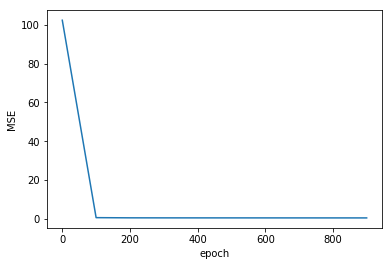

In [19]:
losses = []
for i in range(1000):
    # batch_size:feed batch
    batch_loss = []
    # start and end is the start and the end for the index of batch
    for start in range(0, len(Xtrain), batch_size):
        end = start + batch_size if start + batch_size < len(Xtrain) else len(Xtrain)
        xx = Variable(torch.FloatTensor(Xtrain[start:end]))
        yy = Variable(torch.FloatTensor(Ytrain[start:end]))
        predict = neu(xx)
        loss = cost(predict, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    # print the loss per 100
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

# print the output
plt.plot(np.arange(len(losses))*100,losses)
plt.xlabel('epoch')
plt.ylabel('MSE')

In [4]:
# 用训练好的神经网络在测试集上进行预测

# targets = test_targets['cnt'] #读取测试集的cnt数值
# targets = targets.values.reshape([len(targets),1]) #将数据转换成合适的tensor形式
# targets = targets.astype(float) #保证数据为实数

# 将属性和预测变量包裹在Variable型变量中
xxx = Variable(torch.FloatTensor(Xtest))
predict = neu(xxx)
#yyy = Variable(torch.FloatTensor(Ytest))

predict = predict.data.numpy()
#yyy = Ytest.values

fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(predict, label='Prediction')
ax.plot(Ytest)
ax.legend()
ax.set_xlabel('Sample Id')
ax.set_ylabel('Distances')
fig.show
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(predict)
#ax.plot(Ytest * p2[1][0] + p2[0][0], label='Data')
ax.legend()
ax.set_xlabel('Sample Id')
ax.set_ylabel('Distances')
fig.show

NameError: name 'neu' is not defined

EVS: 0.9949383567630778 
 RMSE: 0.6033327158747797 
 MAE: 0.48410413904825855 
 R2: 0.9919672444131806


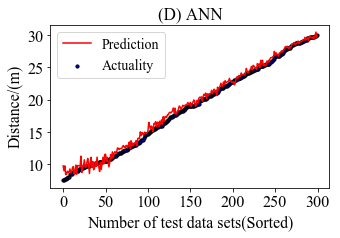

In [6]:
from math import sqrt
neu = torch.load('model.pkl')
#neu.eval()
Xtest = Xtest
xxx = Variable(torch.FloatTensor(Xtest))
predict = neu(xxx)
predict = predict.data.numpy()
y_pred = predict
y_true = Ytest
EVS = explained_variance_score(y_true, y_pred)
MAE = mean_absolute_error(y_true, y_pred)
RMSE = sqrt(mean_squared_error(y_true, y_pred))
R2 = r2_score(y_true, y_pred)
print('EVS:',EVS,'\n','RMSE:',RMSE,'\n', 'MAE:',MAE,'\n','R2:',R2)
y_1 = y_pred
#xx = Xtest.iloc[:,0][:, np.newaxis]

#plt.rcParams['figure.figsize']=(10,4)
font1={'family' : 'Times New Roman','weight': 'normal','size': 14}
#plt.rcParams['font'] = font1
fig, ax = plt.subplots(figsize = (5, 3))
plt.scatter(np.arange(300),y_true, s=10, edgecolor="black",c="blue", label="Actuality")
ax.plot(y_pred, label='Prediction',c = 'r')
#ax.plot(y_true)
ax.legend(fontsize=13,prop=font1)
plt.yticks(fontsize = 16,family = 'Times New Roman')
plt.xticks(np.linspace(0,300,7),fontsize = 16,family = 'Times New Roman')
plt.xticks(np.linspace(0,300,7),fontsize = 16,family = 'Times New Roman')
ax.set_xlabel('Number of test data sets(Sorted)',fontsize = 16,family = 'Times New Roman')
ax.set_ylabel('Distance/(m)',fontsize = 16,family = 'Times New Roman')
plt.title('(D) ANN',fontsize = 17,family = 'Times New Roman')
fig.show
np.savetxt('ANN_error.txt',y_pred-y_true,fmt = '%f4')
plt.savefig('ANN_regression.svg', bbox_inches='tight')

## The parameter of evaluating

In [7]:
y_pred = predict
y_true = Ytest
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

# y_true = REAL
# y_pred = PRE

# MSE
print('MSE:',metrics.mean_squared_error(y_true, y_pred)) # 8.107142857142858
# RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred))) # 2.847304489713536
# MAE
print('MAE:',metrics.mean_absolute_error(y_true, y_pred)) # 1.9285714285714286
# MAPE
print('MAPE:',mape(y_true, y_pred)) # 76.07142857142858
# SMAPE
print('SMAPE:',smape(y_true, y_pred)) # 57.76942355889724

MSE: 0.39272571573996473
RMSE: 0.6266783191877351
MAE: 0.40550120155334485
MAPE: 3.151970150644577
SMAPE: 3.1230687371259305


##### Saving the model

In [22]:
torch.save(neu, 'model.pkl')

##### loding the model

In [5]:
neu = torch.load('model.pkl')
neu.eval()

Sequential(
  (0): Linear(in_features=3, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=8, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=8, out_features=6, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=6, out_features=1, bias=True)
)

# NEURAL NETWORK--classify

## Import packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch as t
import torch
import sys
import d2lzh_pytorch as d2l
from sklearn import metrics
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.optim as optim
print(torch.__version__)
torch.set_default_tensor_type(torch.FloatTensor)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix2

[NbConvertApp] Converting notebook d2lzh_pytorch.ipynb to python
[NbConvertApp] Writing 47013 bytes to d2lzh_pytorch.py


1.4.0+cpu


## Import data

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Fire_Data\val_cross.csv"
                   ,index_col = 0
                  )
data.head()
##The nest two raws code will used when solve classify question
data["BackDistance"]=(data["BackDistance"]>= 15).astype("int")
data["BackDistance"]
type(data)
X = data.iloc[:,data.columns != "BackDistance"]
y = data.iloc[:,data.columns == "BackDistance"]
X.shape, y.shape
(y == 0).sum()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state = 40)
Xtrain.head()
[Xtrain, Xtest, Ytrain, Ytest]
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
Ytrain.head()
yy = Ytest

## Data preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler
#Standardscalar for X data
scalar = StandardScaler()
scalar.fit(Xtrain)
Xtrain = scalar.transform(Xtrain)
Xtest = scalar.transform(Xtest)
Ytrain = Ytrain.values
Ytest = Ytest.values

## Traning Network

In [4]:
# restruct the regression network Neuc
input_size = Xtrain.shape[1]
hidden1_size = 10
hidden2_size = 8
hidden3_size = 6
output_size = 2
batch_size = 16

neuc = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden1_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden1_size,hidden2_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden2_size,hidden3_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden3_size,output_size),
    torch.nn.Sigmoid()
)

# cost = CrossEntropyLoss
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(neuc.parameters(), lr = 0.015)

Y_labels = Ytrain > 0.5
Y_labels = Y_labels.astype(int)
Y_labels = Y_labels.reshape(-1)
Ytrain = Ytrain.reshape(-1)
Ytest = Ytest.reshape(-1)
Ytest

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [5]:
def error_rate(predictions, labels):
    predictions = np.argmax(predictions, axis=1)
    return 100.0 - (
      100.0 *
      np.sum( predictions == labels) /
      predictions.shape[0])

0 0.6974358 65.55232558139535
100 0.6444018 34.44767441860465
200 0.64421105 34.44767441860465
300 0.6440907 34.44767441860465
400 0.64397186 34.44767441860465
500 0.64384574 34.44767441860465
600 0.6437027 34.44767441860465
700 0.6435295 34.44767441860465
800 0.6433054 34.44767441860465
900 0.64299685 34.44767441860465
1000 0.6425414 34.44767441860465
1100 0.6418135 34.44767441860465
1200 0.64052504 34.44767441860465
1300 0.6378899 34.44767441860465
1400 0.6311619 34.44767441860465
1500 0.6070127 34.44767441860465
1600 0.5138899 13.081395348837209
1700 0.41077116 2.1802325581395348
1800 0.37169632 1.744186046511628
1900 0.3562333 1.8895348837209303
2000 0.34862974 1.744186046511628
2100 0.3442542 1.744186046511628
2200 0.34145176 1.744186046511628
2300 0.33951706 1.744186046511628
2400 0.33810645 1.744186046511628
2500 0.3370347 1.744186046511628
2600 0.3361939 1.744186046511628
2700 0.3355169 1.744186046511628
2800 0.3349602 1.744186046511628
2900 0.3344943 1.744186046511628
3000 0.3

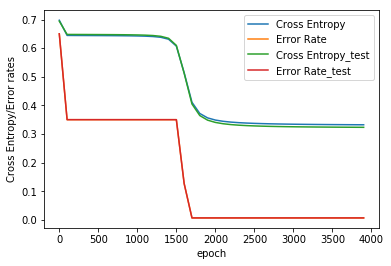

In [5]:
# Training
losses = []
errors = []
losses_test = []
errors_test = []
for i in range(4000):
    batch_loss = []
    batch_errors = []
    for start, end in zip(range(0, len(Xtrain), batch_size), range(batch_size, len(Xtrain)+1, batch_size)):
        xx = Variable(torch.FloatTensor(Xtrain[start:end]))
        yy = Variable(torch.LongTensor(Ytrain[start:end]))
        predict = neuc(xx)
        predict = predict
        #print(predict,yy)
        loss = cost(predict, yy)
        err = error_rate(predict.data.numpy(), yy.data.numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
        batch_errors.append(err)
    

    if i % 100==0:
        losses.append(np.mean(batch_loss))
        errors.append(np.mean(batch_errors))
        print(i, np.mean(batch_loss), np.mean(batch_errors))
        
        xx_test = Variable(torch.FloatTensor(Xtest))
        yy_test = Variable(torch.LongTensor(Ytest))
        predict_test = neuc(xx_test)
        loss_test = cost(predict_test, yy_test)
        err_test = error_rate(predict_test.data.numpy(), yy_test.data.numpy())
        losses_test.append(loss_test)
        errors_test.append(err_test)

plt.plot(np.arange(len(losses))*100,losses, label = 'Cross Entropy')
plt.plot(np.arange(len(losses))*100, np.array(errors_test) / float(100), label = 'Error Rate')
plt.plot(np.arange(len(losses_test))*100,losses_test, label = 'Cross Entropy_test')
plt.plot(np.arange(len(losses_test))*100, np.array(errors_test) / float(100), label = 'Error Rate_test')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy/Error rates')
plt.legend()

0.6666666666666714


Text(0,0.5,'Probabilities')

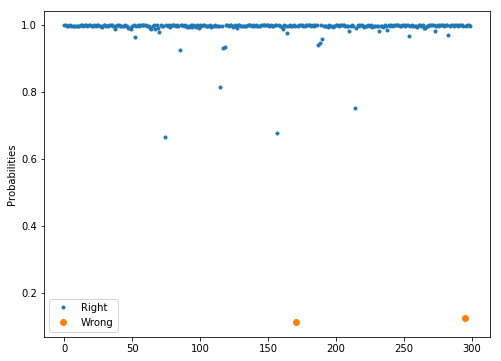

In [7]:

# targets = test_targets['cnt']
# targets = targets.values.reshape([len(targets), 1])
# Y_labels = targets > np.mean(Y)
# Y_labels = Y_labels.astype(int)
Y_labels = Ytest
x = Variable(torch.FloatTensor(Xtest))

# Print the error rate
predict = neuc(x)
print(error_rate(predict.data.numpy(), Y_labels))

# display the error and right data
prob = predict.data.numpy()
rights = np.argmax(prob, 1) == Y_labels
wrongs = np.argmax(prob, 1) != Y_labels
right_labels = Y_labels[rights]
wrong_labels = Y_labels[wrongs]
probs = prob[rights, :]
probs1 = prob[wrongs, :]
rightness = [probs[i, right_labels[i]] for i in range(len(right_labels))]
right_index = np.arange(len(Y_labels))[rights]
wrongness = [probs1[i, wrong_labels[i]] for i in range(len(wrong_labels))]
wrong_index = np.arange(len(Y_labels))[wrongs]
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(right_index, rightness, '.', label='Right')
ax.plot(wrong_index, wrongness,'o',label='Wrong')
ax.legend()
plt.ylabel('Probabilities')
# dates = pd.to_datetime(rides.loc[.index]['dteday'])
# dates = dates.apply(lambda d: d.strftime('%b %d'))
# ax.set_xticks(np.arange(len(dates))[12::24])
# _ = ax.set_xticklabels(dates[12::24], rotation=45)

In [8]:
y_predict = np.argmax(predict.data.numpy(), axis=1)
target_names = ['class 0', 'class 1']
acc = accuracy_score(Ytest, y_predict)
print(classification_report(Ytest, y_predict, target_names=target_names, digits=4))
print('ACC:',acc)

              precision    recall  f1-score   support

     class 0     1.0000    0.9810    0.9904       105
     class 1     0.9898    1.0000    0.9949       195

    accuracy                         0.9933       300
   macro avg     0.9949    0.9905    0.9926       300
weighted avg     0.9934    0.9933    0.9933       300

ACC: 0.9933333333333333


ANN
[[103   2]
 [  0 195]]


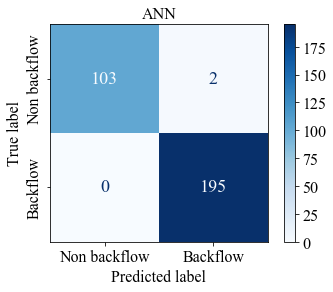

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix2
class_names = ['Non backflow','Backflow']
titles_options = [("ANN", None)
                 #,("Normalized confusion matrix", 'true')
                 ]
for title, normalize in titles_options:
    disp = plot_confusion_matrix2(y_predict, Ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f',
                                 normalize=None)
    disp.ax_.set_title(title,fontsize = 16,family = 'Times New Roman')
    plt.yticks()
    print(title)
    print(disp.confusion_matrix)
    plt.savefig('ANN.svg', bbox_inches='tight')
plt.show()

In [12]:
#############################
# pppppppp
#  lllllllll
#     ooooooooo
#       tttttttttt
##############################
ytest = Ytest.reshape(-1,1).ravel()
yy=y_predict.reshape(-1,1).ravel()
sample = np.arange(300).ravel()
sm = (sample).reshape(-1,1).ravel()
A=[sm,yy,ytest]
B=np.zeros((3, 298))#right
C=np.zeros((3, 2))#falut
np.array(A).shape
m,n = 0,0
for i in range(300):
    if A[1][i] == A[2][i]:
        B[0][m] = A[0][i]
        B[1][m] = A[1][i]
        B[2][m] = A[2][i]
        m = m+1
    else:
        C[0][n] = A[0][i]
        C[1][n] = A[1][i]
        C[2][n] = A[2][i]
        n = n+1
np.savetxt('ANN_right.txt',B,fmt = '%d')
np.savetxt('ANN_fault.txt',C,fmt = '%d')

##### saving the model

In [9]:
torch.save(neuc, 'model_classify.pkl')

##### loading the model

In [6]:
neuc = torch.load('model_classify.pkl')
neuc.eval()

Sequential(
  (0): Linear(in_features=3, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=8, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=8, out_features=6, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=6, out_features=2, bias=True)
  (7): Sigmoid()
)